<a href="https://colab.research.google.com/github/Swethaprabhakar1/-CODING-SAMURAI-INTERNSHIP-TASK/blob/main/Gen_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**CNN for Image Classification (CIFAR-10)**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3417 - loss: 1.7668 - val_accuracy: 0.5442 - val_loss: 1.2779
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5658 - loss: 1.2186 - val_accuracy: 0.5985 - val_loss: 1.1240
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.6317 - loss: 1.0443 - val_accuracy: 0.6244 - val_loss: 1.0512
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.6704 - loss: 0.9428 - val_accuracy: 0.6405 - val_loss: 1.0343
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6942 - loss: 0.8698 - val_accuracy: 0.6584 - val_loss: 0.9561
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7191 - loss: 0.7969 - val_accuracy: 0.6821 - val_loss: 0.9172
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7383 - loss: 0.7494 - val_accuracy: 0.6877 - val_loss: 0.9103
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.7514 -

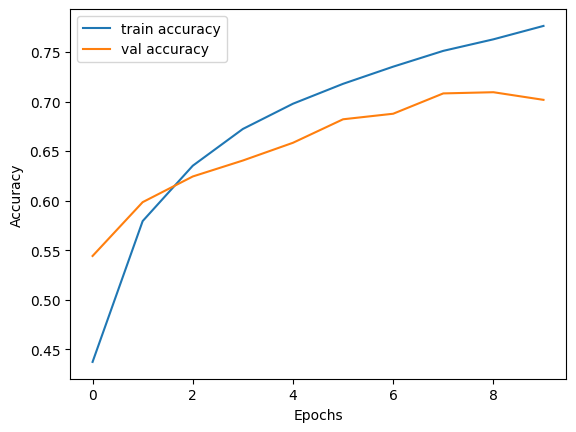

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


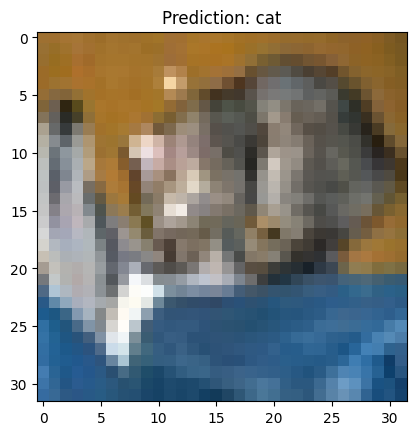

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane','car','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


import numpy as np

probability_model = tf.keras.Sequential([model, layers.Softmax()])
predictions = probability_model.predict(x_test)

plt.imshow(x_test[0])
plt.title("Prediction: " + class_names[np.argmax(predictions[0])])
plt.show()


2.**RNN/LSTM Text Generator (Shakespeare Dataset)**


In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

# 1. Load Dataset (Shakespeare)
path_to_file = tf.keras.utils.get_file("shakespeare.txt",
                                       "/content/shakespeare.txt")

# Read the data
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
print("Length of text:", len(text))

# Unique characters
vocab = sorted(set(text))
print("Unique characters:", len(vocab))

# 2. Tokenize (char level mapping)
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

# 3. Create sequences
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]  # first 100 chars
    target_text = chunk[1:]  # next 100 chars
    return input_text, target_text

dataset = sequences.map(split_input_target)

# 4. Batch training data
BATCH_SIZE = 64
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# 5. Build Model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(rnn_units,
                         return_sequences=True,
                         stateful=True,
                         recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
])

# 6. Loss Function
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

# 7. Train Model
EPOCHS = 5
history = model.fit(dataset, epochs=EPOCHS)

# 8. Generate Text Function
def generate_text(model, start_string):
    # Number of characters to generate
    num_generate = 500

    # Convert start string to numbers
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty result string
    text_generated = []

    temperature = 1.0  # controls randomness (0.2 = conservative, 1.0 = creative)

    # Reset states
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Rebuild model with batch_size=1 for generation
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(rnn_units,
                         return_sequences=True,
                         stateful=True,
                         recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
])

# Load weights from training
model.set_weights(history.model.get_weights())

# Generate text
print(generate_text(model, start_string="ROMEO: "))

Length of text: 1115394
Unique characters: 65
Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 1285s 7s/step - loss: 2.9039
Epoch 2/5
167/172 ━━━━━━━━━━━━━━━━━━━━ 36s 7s/step - loss: 1.8790

**3.CNN + RNN Image Captioning**

In [ ]:
# Image Captioning with CNN + RNN (using Flickr8k dataset)
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Add
from tensorflow.keras.models import Model
import numpy as np
import string

# ----------------------------------------------------
# 1. Load Pretrained CNN (InceptionV3 for image features)
# ----------------------------------------------------
image_model = InceptionV3(weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-2].output  # second last layer
cnn_encoder = Model(new_input, hidden_layer)

# ----------------------------------------------------
# 2. Example Dataset (Flickr8k tiny sample captions)
# ----------------------------------------------------
# Normally, you’d download Flickr8k/MS-COCO dataset.
# Here we use a toy dictionary for demonstration.

captions_dict = {
    "dog.jpg": ["a dog is running in the park", "a brown dog is playing outside"],
    "car.jpg": ["a red car on the road", "a car is parked on the street"]
}

# Tokenizer
all_captions = []
for caps in captions_dict.values():
    all_captions.extend(caps)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

# Encode captions
max_length = max(len(c.split()) for c in all_captions)

# ----------------------------------------------------
# 3. Define RNN Decoder
# ----------------------------------------------------
embedding_dim = 256
units = 512

inputs1 = tf.keras.Input(shape=(2048,))  # CNN features
fe1 = Dense(256, activation='relu')(inputs1)

inputs2 = tf.keras.Input(shape=(max_length,))  # text sequences
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = LSTM(units)(se1)

decoder1 = Add()([fe1, se2])
decoder2 = Dense(units, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

print(model.summary())

# ----------------------------------------------------
# 4. Training (pseudo example, real dataset needed)
# ----------------------------------------------------
# You would loop over each (image, caption) pair:
#  - Extract CNN features from image
#  - Tokenize caption into sequence
#  - Train model with (features, sequence_in) → (next_word)

# For demo, we skip training since Flickr8k/MS-COCO is large.
